In [1]:
import pandas as pd

df = pd.read_csv('final.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   1543 non-null   object 
 1   Player                 1543 non-null   object 
 2   Pos                    1543 non-null   object 
 3   Team Signed            1543 non-null   object 
 4   Age At Signing         1543 non-null   int64  
 5   Start                  1543 non-null   int64  
 6   End                    1543 non-null   int64  
 7   Yrs                    1543 non-null   int64  
 8   Value                  1543 non-null   object 
 9   AAV                    1543 non-null   object 
 10  Type                   831 non-null    object 
 11  Value Adjusted         1543 non-null   int64  
 12  AAV adjusted           1543 non-null   int64  
 13  Performance Season     1543 non-null   object 
 14  PLAYER_ID              1543 non-null   float64
 15  PLAY

In [3]:
# Craete dummies for Position
dummies_pos = pd.get_dummies(df.Pos)
dummies_pos = dummies_pos.astype(int)
dummies_pos.head(3)

,C,PF,PG,SF,SG
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0


In [4]:
df2 = pd.concat([df, dummies_pos], axis='columns')
df2.drop(['Value', 'AAV'], axis='columns', inplace=True)



df2.head()

,Rank,Player,Pos,Team Signed,Age At Signing,Start,End,Yrs,Type,Value Adjusted,...,Season,Efficiency,TS%,PIE,PIE_scaled,C,PF,PG,SF,SG
0,1,Jayson Tatum,PF,BOS,26,2025,2029,5,Designated Veteran Extension,313933410,...,2023-24,27.7,0.604549,0.000081,74.065421,0,1,0,0,0
1,2,Giannis Antetokounmpo,PF,MIL,26,2021,2025,5,Designated Veteran Extension,255917070,...,2020-21,33.3,0.633454,0.000098,87.149533,0,1,0,0,0
2,3,Scottie Barnes,PF,TOR,22,2025,2029,5,Designated Rookie Extension,224237860,...,2023-24,25.1,0.567016,0.000074,68.224299,0,1,0,0,0
3,4,Zion Williamson,PF,NOP,22,2023,2027,5,Designated Rookie Extension,200856009,...,2022-23,27.0,0.650520,0.000079,72.429907,0,1,0,0,0
4,5,Pascal Siakam,PF,IND,30,2024,2027,4,Free Agent,188950272,...,2023-24,23.6,0.599448,0.000069,64.252336,0,1,0,0,0


In [5]:
#dummies_type = pd.get_dummies(df2.Type)
#dummies_type = dummies_type.astype(int)
#dummies_type.head(3)

#df2 = pd.concat([df2, dummies_type], axis='columns')

In [6]:
# Drop all columns in df3 that are strings
df3_dropped = df2.select_dtypes(exclude=['object'])
df3_dropped.loc[0]

Age At Signing           26.0
Start                  2025.0
End                    2029.0
Yrs                       5.0
Value Adjusted    313933410.0
                     ...     
C                         0.0
PF                        1.0
PG                        0.0
SF                        0.0
SG                        0.0
Name: 0, Length: 78, dtype: float64

In [7]:
X = df3_dropped.drop(['Value Adjusted', 'TEAM_ID', 'AAV adjusted', 'WNBA_FANTASY_PTS', 'End', 'Start', 'WNBA_FANTASY_PTS_RANK', 'PLAYER_ID', 'PIE', 'NBA_FANTASY_PTS', 'TD3_RANK',
                      'MIN_RANK', 'L_RANK', 'W_RANK', 'W', 'L','FTM', 'FTA', 'OREB', 'DREB','FGM', 'FGA','FG3M', 'FG3A','FTM', 'FTA','PFD','PLUS_MINUS', 'DD2', 'TD3','TS%',
                      'W', 'L', 'BLKA','OREB', 'DREB', 'W_PCT'],axis='columns')

X = X.loc[:, ~X.columns.str.contains('_RANK')]
X['FG_PCT'] = X['FG_PCT'] * 100
X['FG3_PCT'] = X['FG3_PCT'] * 100
X['FT_PCT'] = X['FT_PCT'] * 100

X_1 = X
# Drop the columns that have least feature importance 
# Drop the columns with the least importance
X.drop(['FG_PCT', 'FG3_PCT', 'Age At Signing'], axis='columns', inplace=True)

X.head(3)

,Yrs,AGE,GP,MIN,FT_PCT,REB,AST,TOV,STL,BLK,PF,PTS,Efficiency,PIE_scaled,C,PF,PG,SF,SG
0,5,26.0,74.0,35.7,83.3,8.1,4.9,2.5,1.0,0.6,2.0,26.9,27.7,74.065421,0,1,0,0,0
1,5,26.0,61.0,33.0,68.5,11.0,5.9,3.4,1.2,1.2,2.8,28.1,33.3,87.149533,0,1,0,0,0
2,5,22.0,60.0,34.9,78.1,8.2,6.1,2.8,1.3,1.5,2.0,19.9,25.1,68.224299,0,1,0,0,0


In [8]:
y = df3_dropped['AAV adjusted']
y

0       62786682
1       51183414
2       44847572
3       40171201
4       47237568
          ...   
1538     1397065
1539     4409551
1540     2032236
1541     4064473
1542     4839068
Name: AAV adjusted, Length: 1543, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [10]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7093370524817972

In [11]:
# Use K Fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

# Find the mean scores of the 5 splits
scores_mean = cross_val_score(LinearRegression(), X, y, cv=cv).mean()
scores_mean

0.6930963746397932

We can see that in 5 iterations we get a mean score around 70%. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score.

In [12]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and Train Regression Models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('Support Vector Regressor', SVR(kernel='linear')),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42)),
    ('Lasso Regression', Lasso(alpha=0.1)),
    ('Ridge Regression', Ridge(alpha=0.1))
]

for model_name, model in models:
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate MSE and R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f'Model: {model_name}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')
    print('---')

Model: Linear Regression
Mean Squared Error (MSE): 34458398851825.2500
R-squared (R2): 0.7093
---
Model: Decision Tree Regressor
Mean Squared Error (MSE): 56742372425820.7656
R-squared (R2): 0.5214
---
Model: Random Forest Regressor
Mean Squared Error (MSE): 33648903096410.5039
R-squared (R2): 0.7162
---
Model: Support Vector Regressor
Mean Squared Error (MSE): 133426390889131.8125
R-squared (R2): -0.1255
---
Model: Gradient Boosting Regressor
Mean Squared Error (MSE): 31942969377369.8398
R-squared (R2): 0.7306
---
Model: Lasso Regression
Mean Squared Error (MSE): 34460867629767.2539
R-squared (R2): 0.7093
---
Model: Ridge Regression
Mean Squared Error (MSE): 34464713804470.9766
R-squared (R2): 0.7093
---


c:\Users\cjh05\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.433e+16, tolerance: 1.539e+13
  model = cd_fast.enet_coordinate_descent(


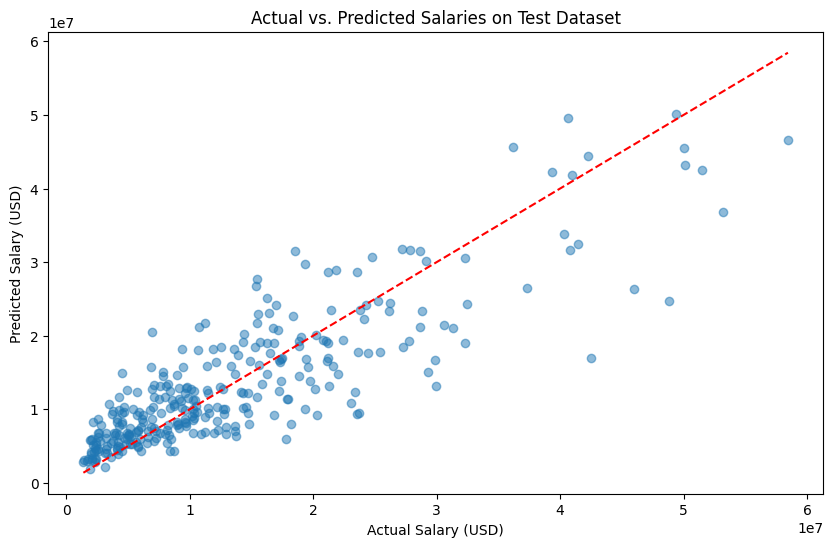

Mean Squared Error (MSE): 31942969377369.8398
R-squared (R2): 0.7306


In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain the GB Regressor on the full training data
rf_model =  GradientBoostingRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate MSE and R2 on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get predictions, actual values, and player names for the test set into a dataframe
predictions_df = pd.DataFrame({
    'Player Name': df2['PLAYER_NAME'].iloc[y_test.index],
    'Season': df2['Start'].iloc[y_test.index],
    'Performance Season': df2['Performance Season'].iloc[y_test.index],
    'Actual Salary': y_test,
    'Predicted Salary': y_pred
})

# Plot actual vs. predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Salaries on Test Dataset')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')


plt.show()

# Print MSE and R2
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

In [14]:
predictions_df['Predicted Salary'] = predictions_df['Predicted Salary'].astype(int)
predictions_df.head(10)

,Player Name,Season,Performance Season,Actual Salary,Predicted Salary
1457,Mike Dunleavy,2013,2012-13,4257973,7678119
989,Matthew Dellavedova,2016,2015-16,12197521,8377942
244,Nick Collison,2011,2010-11,3735928,9324900
1467,Kevin Knox II,2022,2021-22,3179478,2210285
31,Harrison Barnes,2016,2015-16,29974394,13191747
601,Mike Muscala,2019,2018-19,2568934,6277822
191,Paul Millsap,2013,2012-13,12428724,13059597
123,Brian Cardinal,2004,2003-04,9300769,11152673
897,Mike Conley,2021,2020-21,25434655,17744422
125,Ryan Anderson,2012,2011-12,11280270,21732043


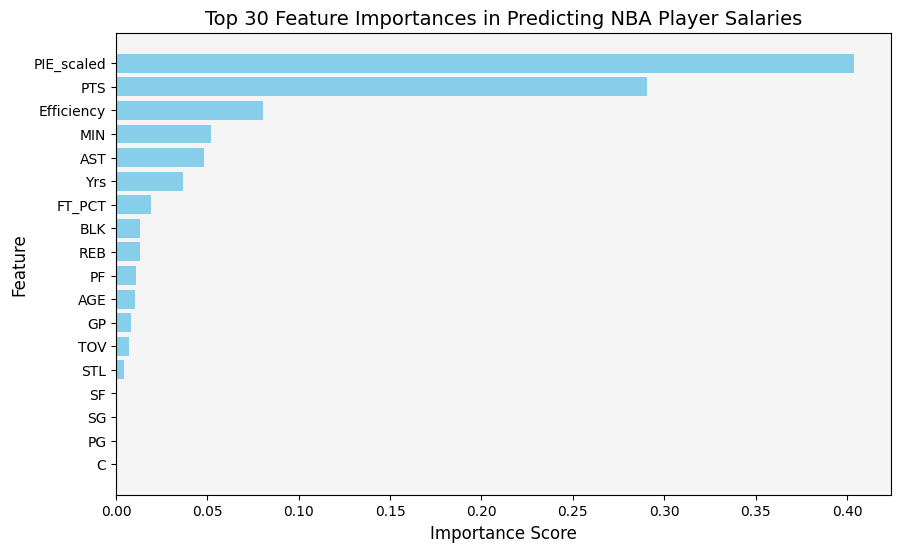

In [15]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

colors = ['skyblue' if importance > 0 else 'gray' for importance in importance_df['Importance']]


# Create an eye-catching horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:30], importance_df['Importance'][:30], color=colors)
plt.title('Top 30 Feature Importances in Predicting NBA Player Salaries', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top

# Add a cool background
ax = plt.gca()
ax.set_facecolor('#f5f5f5')

plt.show()

In [16]:
# Calculate absolute and percentage difference between actual salary and predicted salary
predictions_df['Absolute Difference'] = predictions_df['Actual Salary'] - predictions_df['Predicted Salary']
predictions_df['Percentage Difference'] = (predictions_df['Absolute Difference'] / predictions_df['Predicted Salary']) * 100

# Get the top 20 most overpaid players
predictions_df.sort_values(by='Percentage Difference', ascending=False).head(20)

,Player Name,Season,Performance Season,Actual Salary,Predicted Salary,Absolute Difference,Percentage Difference
1290,Manu Ginobili,2016,2015-16,17774166,6010955,11763211,195.696208
67,Jerami Grant,2020,2019-20,23550084,9311487,14238597,152.914320
617,OG Anunoby,2024,2023-24,42500000,17008019,25491981,149.882129
874,Allen Crabbe,2016,2015-16,23751523,9542498,14209025,148.902572
426,Theo Ratliff,2005,2004-05,18201911,7983197,10218714,128.002779
31,Harrison Barnes,2016,2015-16,29974394,13191747,16782647,127.220807
359,Timofey Mozgov,2016,2015-16,20313333,9282286,11031047,118.839766
1053,Gary Harris,2022,2021-22,13777739,6445336,7332403,113.762929
345,Joakim Noah,2016,2015-16,23039763,10875055,12164708,111.858818
233,Drew Gooden,2013,2012-13,8749037,4368314,4380723,100.284068


In [17]:
# Get the top 20 most underpaid players
predictions_df.sort_values(by='Percentage Difference', ascending=True).head(20)

,Player Name,Season,Performance Season,Actual Salary,Predicted Salary,Absolute Difference,Percentage Difference
1452,Alfonzo McKinnie,2019,2018-19,2186330,8280900,-6094570,-73.597918
1185,Vit Krejci,2024,2023-24,2546303,8726855,-6180552,-70.822215
1318,Raja Bell,2010,2009-10,4526492,14892117,-10365625,-69.604778
558,Andre Drummond,2022,2021-22,3476229,10742133,-7265904,-67.639304
299,Darius Bazley,2023,2022-23,1950201,5809288,-3859087,-66.429604
247,Tim Duncan,2015,2014-15,6974673,20460452,-13485779,-65.911442
567,Jericho Sims,2022,2021-22,1998904,5773785,-3774881,-65.379660
1519,James Ennis III,2018,2017-18,2103361,6017087,-3913726,-65.043534
1248,Jeremy Lin,2015,2014-15,2811889,7860168,-5048279,-64.226095
1458,Andrei Kirilenko,2013,2012-13,4257973,11614124,-7356151,-63.337975


In [18]:
import numpy as np

def predict_salary(position, Yrs, Age, GP, MIN, FT_PCT, REB, AST, TOV, STL, BLK, PTS, Efficiency, PIE_scaled, C, PF, PG, SF, SG):
    
    loc_index = np.where(X.columns==position)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = Yrs
    x[1] = Age
    x[2] = GP
    x[3] = MIN
    x[4] = FT_PCT
    x[5] = REB
    x[6] = AST
    x[7] = TOV
    x[8] = STL
    x[9] = BLK
    x[10] = PTS
    x[11] = Efficiency
    x[12] = PIE_scaled
    x[13] = C
    x[14] = PF
    x[15] = PG
    x[16] = SF
    x[17] = SG
    
    
    if loc_index >= 0:
        x[loc_index] = 1

    x = scaler.transform([x])[0]
    
    return rf_model.predict([x])[0]

In [19]:
predict_salary(position='C', Yrs=1, Age=21, GP=50, MIN=20, FT_PCT=90, REB=5, AST=1, TOV=1, STL=1, BLK=1, PTS=10, Efficiency=15, PIE_scaled=30, C=1, PF=0, PG=0, SF=0, SG=0)

c:\Users\cjh05\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


11611520.106605288

In [20]:
# save the model as a pickle file
import pickle
with open('Flask Server Salary/server/artifacts/NBA_player_salary_model.pickle','wb') as f:
    pickle.dump(rf_model,f)
    

# Save the columns the model was trained on
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("Flask Server Salary/server/artifacts/columns.json","w") as f:
    f.write(json.dumps(columns))
    
    
# Save the scaler as a pickle file
with open('Flask Server Salary/server/artifacts/scaler.pickle','wb') as f:
    pickle.dump(scaler,f)